<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.core.algorithms import quantile
from datetime import datetime, date
from scipy.stats import linregress

In [41]:

# Data retrieval from a csv file from githut
def get_data(url):
  df = pd.read_csv(url)
  print(df.info())
  return df

  
# Sort and clean data
def clean_data(original_df, sortby):
  # sort dataframe by date
  original_df = original_df.sort_values(by = sortby, ascending = True)
  original_df = original_df.dropna()
  original_df = original_df.drop_duplicates()
  return original_df
  
# Programs starts here
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
original_df = get_data(url)   # Data retriveal
cleaned_df = clean_data(original_df, 'date')   # sort and clean data
display(cleaned_df)
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = cleaned_df.index[0]
expected = 0

if actual == expected and len(cleaned_df) == 1304:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual, "and length of series should have been 1304 but was", len(clean_data(original_df)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB
None


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


Test passed 0


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


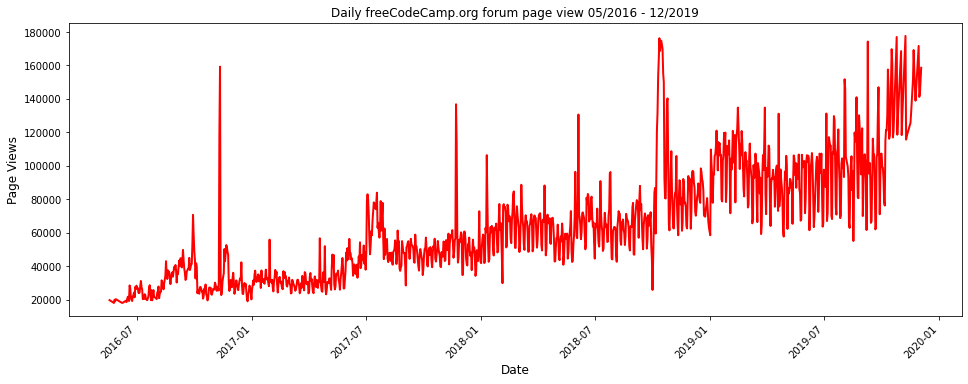

In [42]:
def generate_lineplot(df,col,charttitle,x_label,y_label):
  # Line Plot using 'plot' function on dataframe
  data = df[col] #copy_df.groupby(['year','month'])["value"].mean()
  labels = data.keys()
  # plt.title("Daily freeCodeCamp.org forum page view 05/2016 and 12/2019")
  df[col].plot(kind='line', figsize=(16, 6), title=charttitle, fontsize=10, color='red', linewidth=2) #, marker='o', markersize=2);
  # plt.plot(labels, data, color='red') 
  # plt.rcParams['figure.figsize'] = (12, 5)
  plt.xticks(rotation=45)
  plt.xlabel(x_label, fontsize=12)
  plt.ylabel(y_label, fontsize=12)
  # plt.grid()
  plt.show()

# convert the date column to datetime type
copy_df = cleaned_df.copy()
copy_df['date'] = pd.to_datetime(copy_df.date)
copy_df.date
# create 3 new columns for year , month and day
copy_df['year'] = copy_df.date.dt.year  
copy_df['month'] = copy_df.date.dt.strftime("%m") 
copy_df['day'] = copy_df.date.dt.day 

# set index to the date column
# df.index = df['date']
copy_df = copy_df.set_index('date') #,inplace=True)
copy_df

# filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
top = copy_df['value'].quantile(0.975)
bottom = copy_df['value'].quantile(0.025)
# remove outliers
final_df = copy_df[(copy_df['value'] <= top) & (copy_df['value'] >= bottom)]   
# display(final_df)

generate_lineplot(final_df, 'value','Daily freeCodeCamp.org forum page view 05/2016 - 12/2019','Date', 'Page Views')

In [43]:
# with pd.ExcelWriter('r‘\pinhsuanchen\Desktop\pageview.xlsx') as writer:  
#   cleaned_df.to_excel(writer, sheet_name='cleaned_df')
#   final_df.to_excel(writer, sheet_name='final_df')


###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


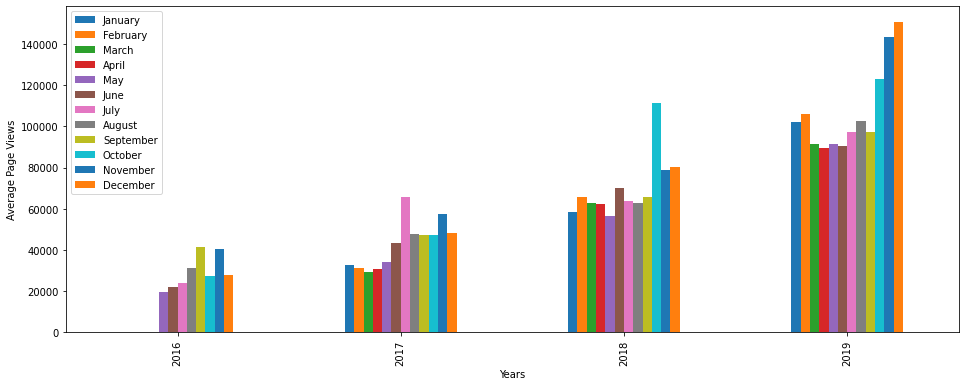

,value,year,month,day
date,,,,
2016-05-19,19736,2016,05,19
2016-05-26,18060,2016,05,26
2016-05-27,19997,2016,05,27
2016-05-28,19044,2016,05,28
2016-05-29,20325,2016,05,29
...,...,...,...,...
2019-11-24,138875,2019,11,24
2019-11-29,171584,2019,11,29
2019-11-30,141161,2019,11,30


In [44]:
fig, ax = plt.subplots(figsize=(16, 6))
df_pivot = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')
df_pivot.plot(kind='bar', ax=ax)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
ax.legend(
    ['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November','December']);
plt.show()
display(final_df)


###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


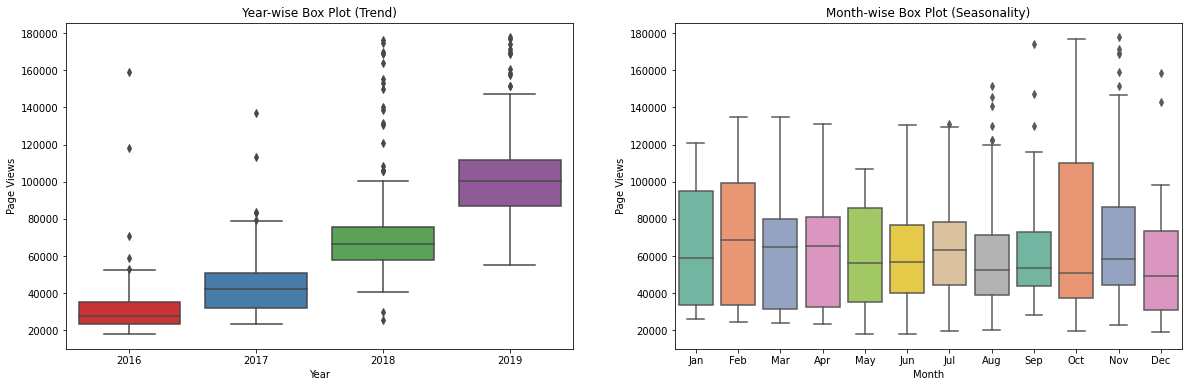

In [45]:
#create seaborn boxplots by group
#A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

# setting the dimensions of the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# sort the rows by date
boxplot_final_df = final_df.copy()
boxplot_final_df.sort_values(by=["month"], inplace=True)
# display(final_df)
# create a support series with the name of the month of each row
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = boxplot_final_df["month"].apply(lambda month: month_names[int(month)-1])

# drawing the plot
color_palette1 = "Set1"
color_palette2 = "Set2"
# sns.boxplot(x='year', y='value', data=final_df, showfliers=True,flierprops = dict(markerfacecolor = '0.99', markersize = 1), palette=color_palette).set(title='Year-wise Box Plot (Trend)')
sns.boxplot(x='year', y='value', data=boxplot_final_df, orient='v', ax=axes[0], palette=color_palette1).set(title='Year-wise Box Plot (Trend)', xlabel='Year',ylabel='Page Views')
# sns.boxplot(x='month', y='value', data=final_df, orient='v', ax=axes[1], palette=color_palette2).set(title='Month-wise Box Plot (Seasonality)', xlabel='Month',ylabel='Page Views')
sns.boxplot(x=months, y='value', data=boxplot_final_df, orient='v', ax=axes[1], palette=color_palette2).set(title='Month-wise Box Plot (Seasonality)', xlabel='Month',ylabel='Page Views')
plt.show()



###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


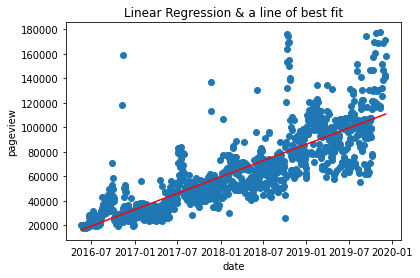

slope -  73.2 
intercept -  16099.0 
rsquared -  0.692 
pval -  3.855767e-318 

Prediction pageview for 2020, 2025 and 2030:
2020  -  139507
2025  -  273084
2030  -  406661


In [159]:
# calculate liner regression 
def cal_lin_regress(df,col1,col2):
  delta = df.index - df.index[0] #only works if it is an index
  x = delta.days #use days from start date
  y = df[col2]
  
  regression = linregress(x,y)
  # print(regression)
  slope = regression.slope
  yint = regression.intercept
  rsquared = (regression.rvalue)**2
  pval = regression.pvalue
  return slope, yint, rsquared, pval


# Plot data points and matplotlib ploting
def plot_regression(df,slope, intercept):
  wee_df = df
  y = wee_df['value']
  x = wee_df.index
  delta = wee_df.index - wee_df.index[0]
  x_days = delta.days #use days from start date 

  plt.title('Linear Regression & a line of best fit')
  plt.ylabel("pageview")
  plt.xlabel("date")
  plt.scatter(x,y)
  #best fit  
  # plt.figure(figsize=(12,6))
  plt.plot(x, slope * x_days + intercept, color="red", label = "Best Fit")  
  plt.show()
  earliest_date = wee_df.index[0].date()
  return earliest_date# returns the start date


# Prediction
def predict_outcome_3(slope, intercept, year_to_predict, start_date):
  predict_date = dt.date(year_to_predict, 12, 31) 
  predict_date_toordinal = predict_date.toordinal() 
  delta_date = predict_date - start_date 
  predicted = intercept + slope * delta_date.days #delta_date is datetime.timedelta and can just view the .days
  return predicted


timestamps_final_df3 = final_df.copy()
timestamps_final_df3['date_timestamps'] = pd.to_datetime(timestamps_final_df3.index.values)
timestamps_final_df3['date_timestamps'] = timestamps_final_df3['date_timestamps'].map(dt.datetime.toordinal)
# Calculate liner regression
year_slope, year_intercept,rsquared, pval = cal_lin_regress(timestamps_final_df3,"date","value")

# Generate Plot & the earliest date
min_date = plot_regression(final_df, year_slope, year_intercept)

# Predict pageview trend
print("slope - ",round(year_slope,1),"\nintercept - ",round(year_intercept,1),"\nrsquared - ",round(rsquared,3),"\npval - ",pval,"\n")
print("Prediction pageview for 2020, 2025 and 2030:")
for num in (2020,2025,2030):
  print(num, " - ",round(predict_outcome_3(year_slope, year_intercept, num,min_date)))

In [ ]:
#A common way to find a straight line that fits some scatter data is the least squares method.  
# For a given set of points (xn, yn) and a line L, for each point you calculate the distance, dn, between the point and the line, then calculate the sum of the squares of the distances:
# s = d0*d0 + d1*d1 + d2*d2 ...
# This sum is a measure of the total error of the line fit. The best line is the one that has the smallest s value.
# There is a formula for finding the best fit of a line to a set of (x, y) data points, and fortunately NumPy has an implementation of that formula:
# m, c = np.polyfit(year, value, 1)
# print(m, c) 
# polyfit takes an array of x-values, and array of y-values, and a polynomial degree. Setting the degree to 1 gives a straight line fit.
# The m and c values plug into the standard equation of a straight line:
# y = m*x + c
# This is a line that crosses the y-axis at c, and has a slope of m. If we plug is a couple of values for x (height 169 and 189), it gives us two points that we can use to draw the line


# Reflect

What caused the biggest problems?

If it's wrong dataframe, it will cause different result. 

Converting Datetime format to unix timestamps is tricky when date is index.   

using df = timestamps_final_df.index.to_julian_date() or .toordinal() to generate ordinal value will have different results. 


How did you solve these problems?

Break problems to small pieces. 
Search for the documents and asked teams. 